In [6]:
import skimage.io
import numpy as np

prefix = '../Curated Images/'

images = { 'filename':'recording1.czi - recording1.czi #03.tif', 'rounded':69, 'egress':76  }

img = skimage.io.imread(''.join([prefix,'recording1.czi - recording1.czi #03.tif']))

print img.shape


(124, 2, 512, 512)


[]


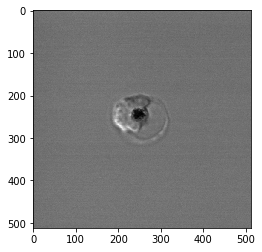

In [7]:
from skimage.feature import blob_log
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img[0,1,:,:],cmap='gray');
print(blob_log(img[0,1,:,:]))

In [8]:
from scipy.ndimage.measurements import center_of_mass

com = np.array([int(x) for x in center_of_mass(img[0,0,:,:])]).reshape(1,2)
print(com)
from skimage.segmentation import active_contour
from skimage.segmentation import random_walker

labels = random_walker(img[0,1,:,:], com, beta=10, mode='bf')
active_contour(img[0,1,:,:], com)                               

[[251 247]]


/Users/gu6/anaconda/envs/py27/lib/python2.7/site-packages/skimage/segmentation/random_walker_segmentation.py:361: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  warn('Random walker only segments unlabeled areas, where '


array([[ 252.08785793,  250.17333602]])

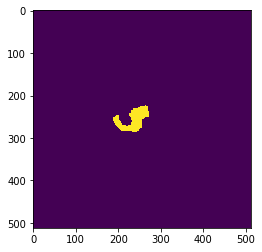

In [125]:
def cellmask_from_img(image):

    import numpy as np
    from skimage.morphology import binary_closing,binary_opening,binary_erosion,binary_dilation
    from skimage.filters import gaussian 
    from scipy.ndimage.filters import sobel
    from skimage.filters import threshold_otsu
    
    blurred_image = gaussian(image, sigma=0.0001)                             
    
    # simple sobel edge detector
    horizontal = sobel(blurred_image,0)
    vertical = sobel(blurred_image,1)
    edges = np.hypot(horizontal,vertical)
    
    # threshold edge image
    binary = magnitude > threshold_otsu(edges)
    
    #generate large circular mask
    r = 10
    y,x = np.ogrid[-r:r, -r:r]
    mask1 = x*x + y*y <= r*r
    
    #generate small circular mask
    r = 5
    y,x = np.ogrid[-r:r, -r:r]
    mask2 = x*x + y*y <= r*r
    
    # closing
    binary = binary_closing(binary,mask1)
    
    # opening
    binary = binary_opening(binary,mask2)

        
    return binary

plt.imshow(cellmask_from_img(image))


In [102]:
images = [
            { 'filename':'recording1.czi - recording1.czi #03.tif', 'rounded':69, 'egress':76, 'notes':'' },
            { 'filename':'recording1.czi - recording1.czi #07.tif', 'rounded':95, 'egress':102, 'notes':'' },
            { 'filename':'recording1.czi - recording1.czi #09.tif', 'rounded':109, 'egress':114, 'notes':'egress fail' },
            { 'filename':'recording1.czi - recording1.czi #12.tif', 'rounded':23, 'egress':28, 'notes':'' },
            { 'filename':'recording1.czi - recording1.czi #13.tif', 'rounded':90, 'egress':100, 'notes':'egress fail' },
            { 'filename':'recording1.czi - recording1.czi #14.tif', 'rounded':8, 'egress':12, 'notes':'' },
            { 'filename':'recording1.czi - recording1.czi #17.tif', 'rounded':73, 'egress':81, 'notes':'' },
            { 'filename':'recording1.czi - recording1.czi #18.tif', 'rounded':9, 'egress':13, 'notes':'' },
            { 'filename':'recording2.czi - recording2.czi #03.tif', 'rounded':61, 'egress':69, 'notes':'' },
            { 'filename':'recording2.czi - recording2.czi #04.tif', 'rounded':38, 'egress':42, 'notes':'egress fail' },
            { 'filename':'recording2.czi - recording2.czi #05.tif', 'rounded':28, 'egress':40, 'notes':''},
            { 'filename':'recording2.czi - recording2.czi #06.tif', 'rounded':104, 'egress':110, 'notes':'' },
            { 'filename':'recording2.czi - recording2.czi #09.tif', 'rounded':63, 'egress':69, 'notes':'' },
            { 'filename':'recording2.czi - recording2.czi #11.tif', 'rounded':26, 'egress':31, 'notes':'' },
            { 'filename':'recording2.czi - recording2.czi #14.tif', 'rounded':26, 'egress':33, 'notes':'' },
            { 'filename':'recording2.czi - recording2.czi #15.tif', 'rounded':75, 'egress':82, 'notes':'' },
            { 'filename':'recording2.czi - recording2.czi #17.tif', 'rounded':73, 'egress':78, 'notes':'' },
            { 'filename':'recording2.czi - recording2.czi #18.tif', 'rounded':0, 'egress':6, 'notes':'' },
            { 'filename':'recording2.czi - recording2.czi #20.tif', 'rounded':90, 'egress':96, 'notes':'' },
            { 'filename':'timelapse.czi - timelapse.czi #10.tif', 'rounded':455, 'egress':463, 'notes':'' },
            { 'filename':'timelapse.czi - timelapse.czi #12.tif', 'rounded':194, 'egress':198, 'notes':'' },
            { 'filename':'timelapse.czi - timelapse.czi #13.tif', 'rounded':134, 'egress':139, 'notes':'' },
            { 'filename':'timelapse.czi - timelapse.czi #16.tif', 'rounded':250, 'egress':254, 'notes':'' },
            { 'filename':'timelapse.czi - timelapse.czi #19.tif', 'rounded':145, 'egress':151, 'notes':'' },
            { 'filename':'timelapse.czi - timelapse.czi #20.tif', 'rounded':254, 'egress':259, 'notes':'' }
        ]
prefix = '../Curated Images/'

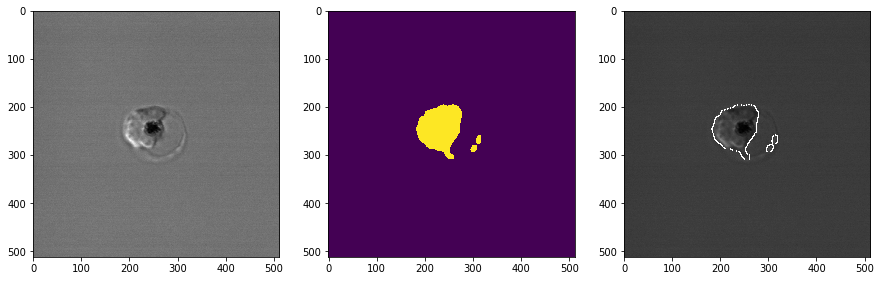

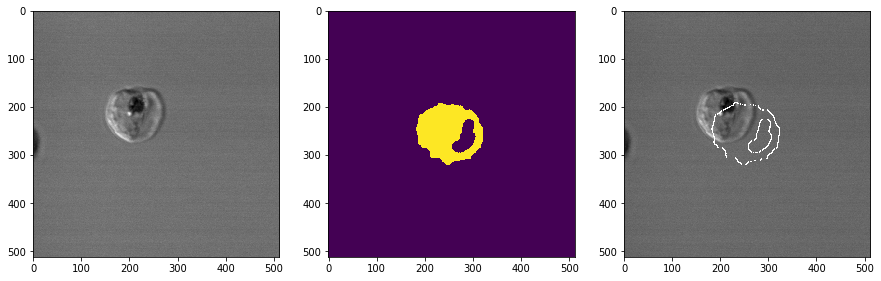

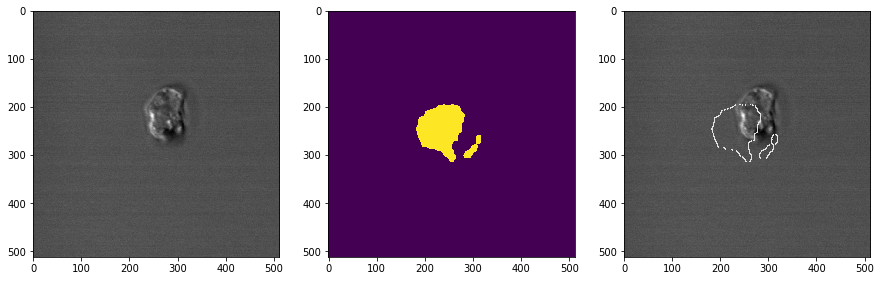

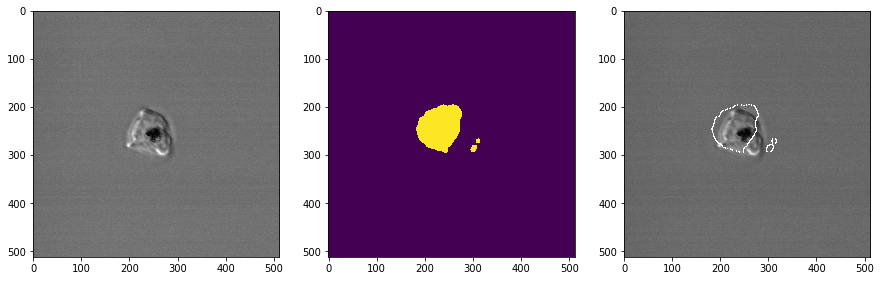

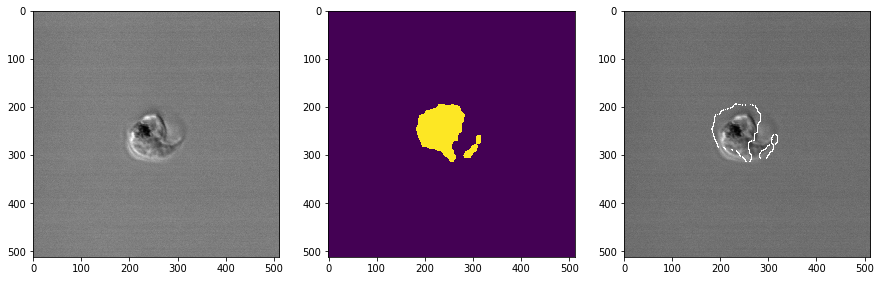

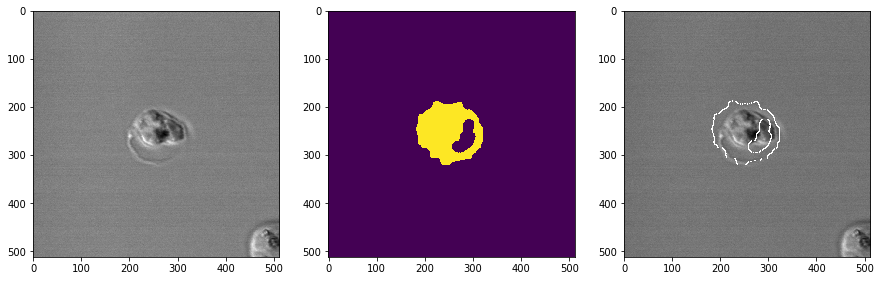

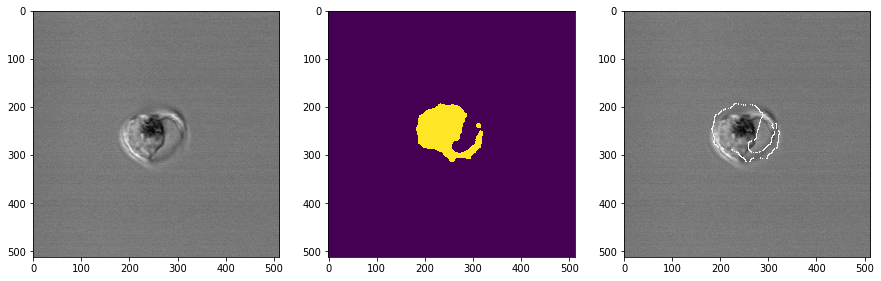

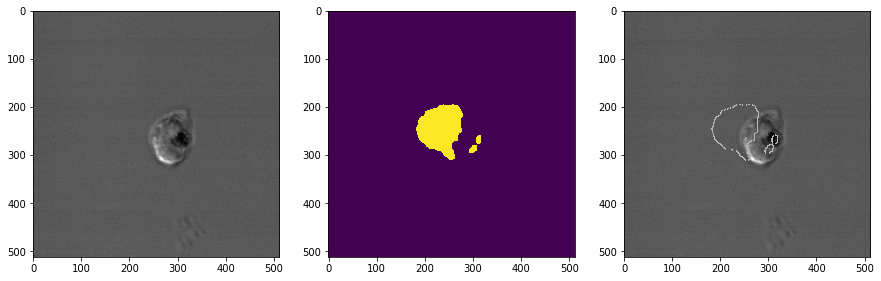

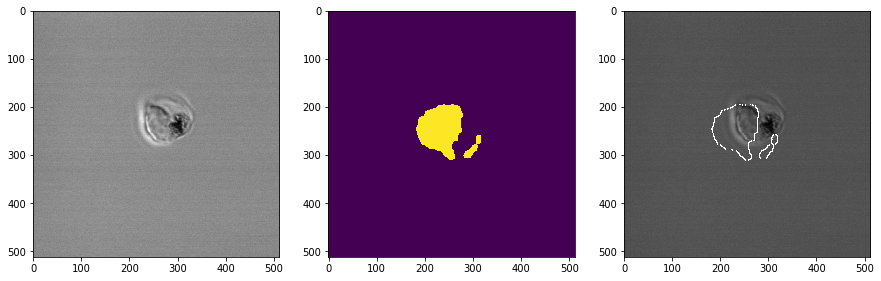

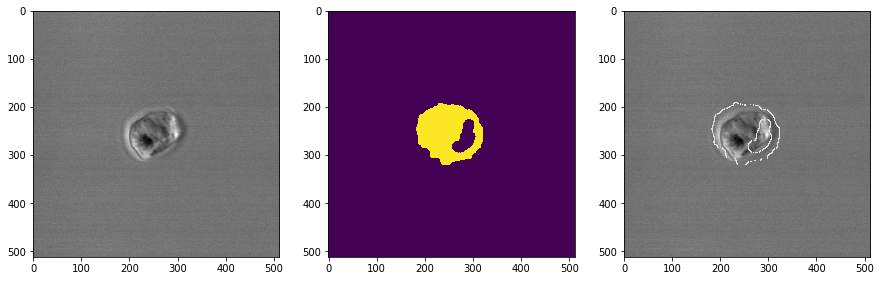

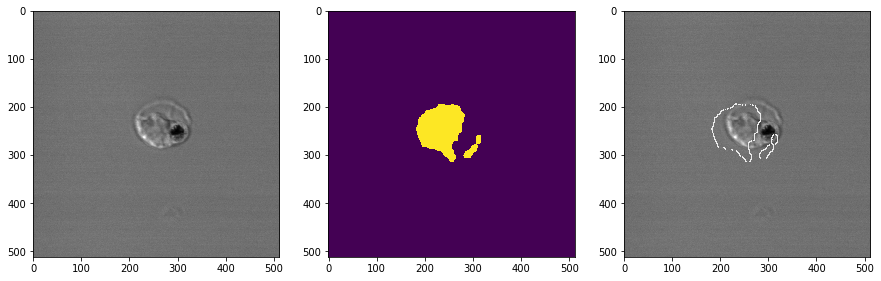

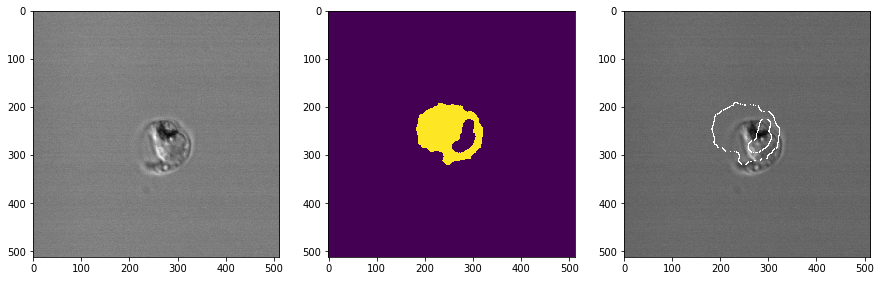

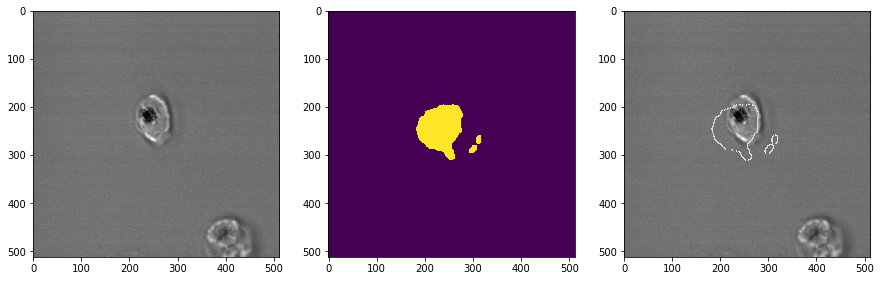

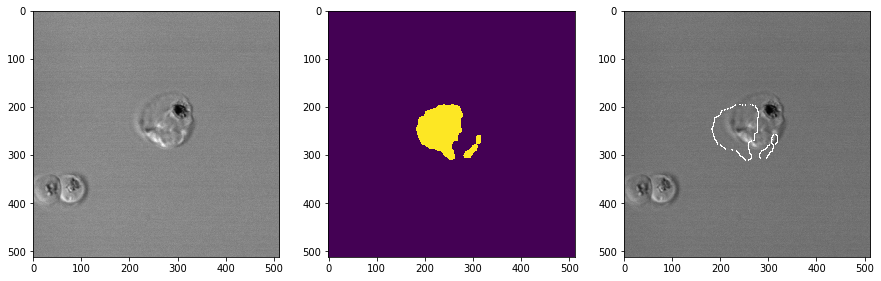

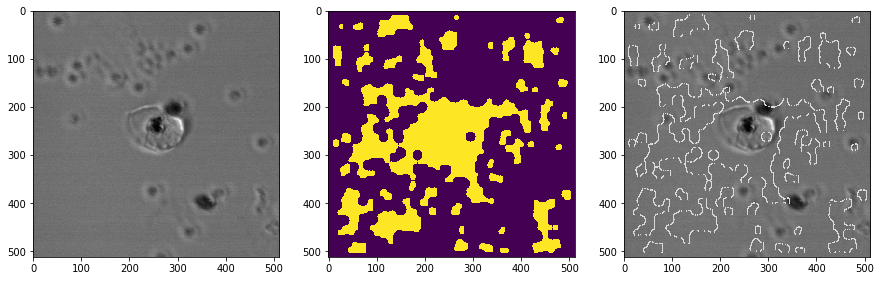

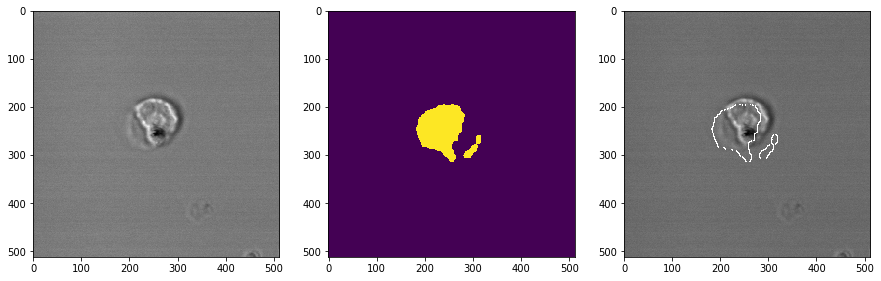

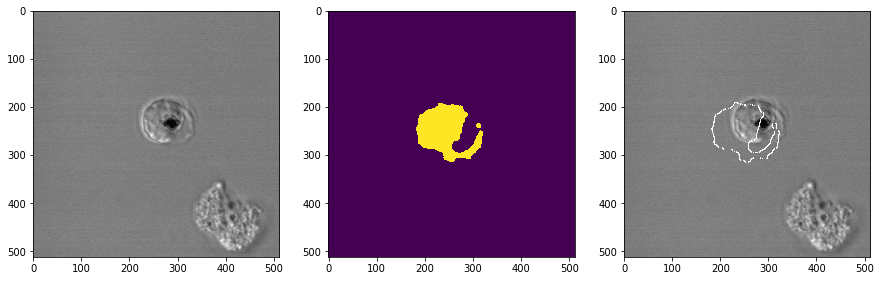

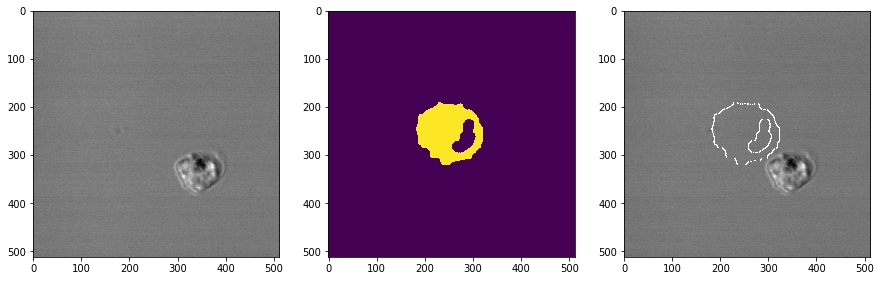

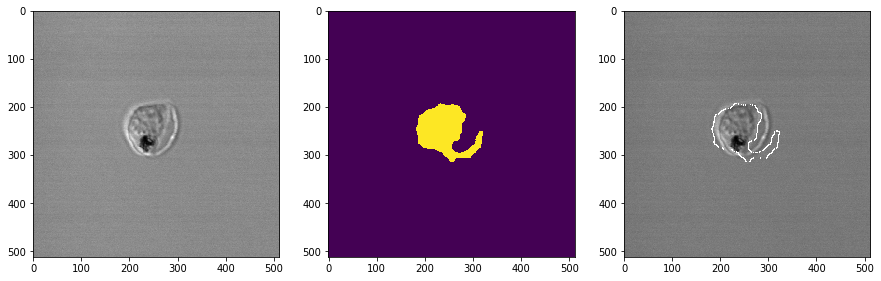

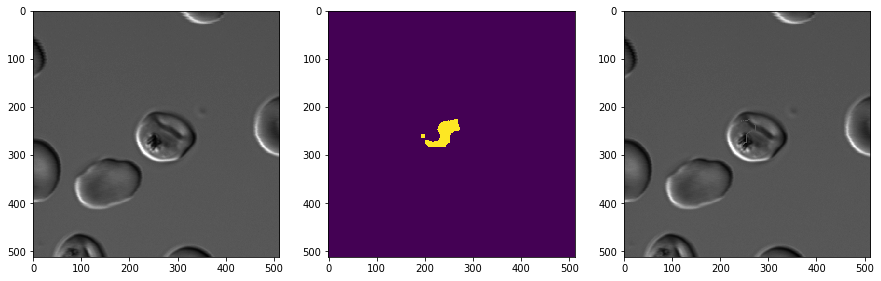

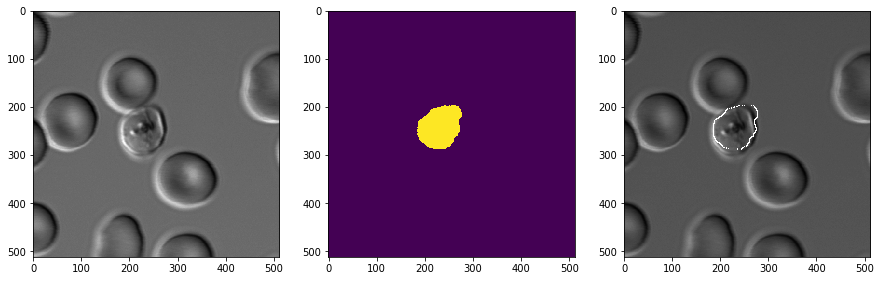

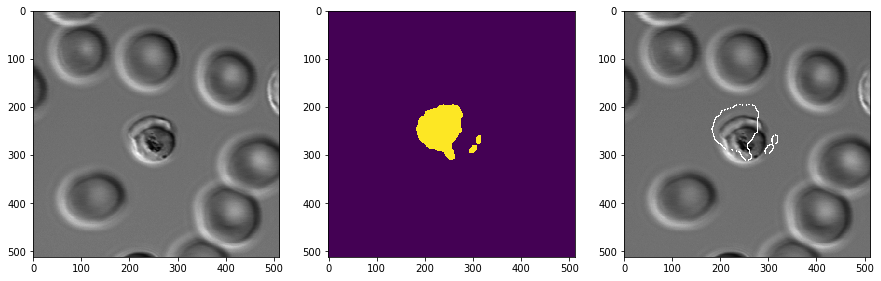

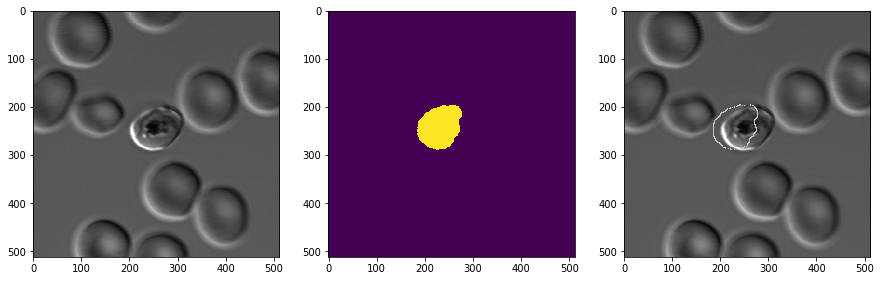

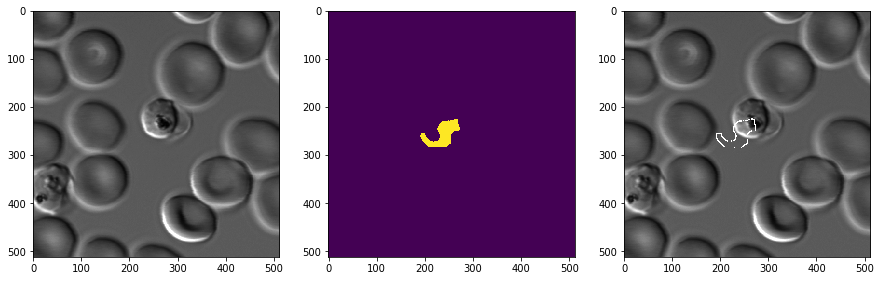

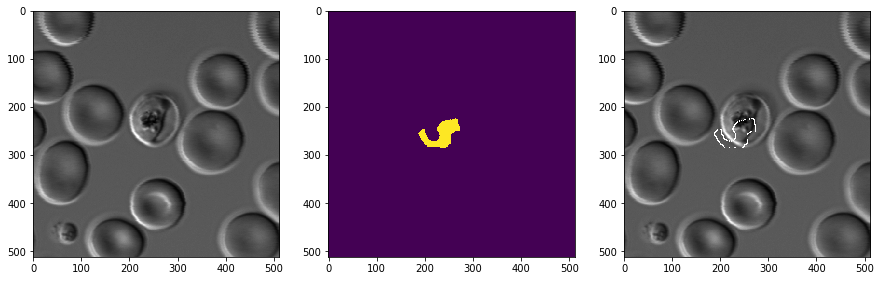

In [123]:
import gc

masks = []
for image_dict in images:
    m = np.max(image)
    img = skimage.io.imread(''.join([prefix,image_dict['filename']]))
    image = img[0,1,:,:]
    plt.figure(figsize= (15,5))
    plt.subplot(1,3,1)
    plt.imshow(image,cmap='gray')
    out = cellmask_from_img(image)
    edge = sobel(out) * m
    
    plt.subplot(1,3,2)
    
    plt.imshow(out)
    
    plt.subplot(1,3,3)
    plt.imshow(np.maximum(edge,image),cmap='gray')
    plt.show()
    gc.collect()

/Users/gu6/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.
  from ipykernel import kernelapp as app


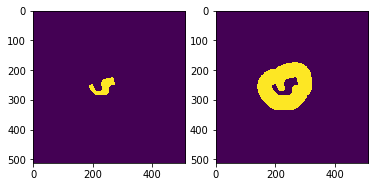

In [128]:
def get_donut(center_mask):
    
    # takes a mask and returns the donut mask around it
    
    import numpy as np
    from skimage.morphology import binary_dilation
    
    #generate circular mask for dilation
    r = 50
    y,x = np.ogrid[-r:r, -r:r]
    circle = x*x + y*y <= r*r
    
    total_mask = binary_dilation(center_mask,circle)
    donut_mask = total_mask - center_mask
    
    return donut_mask
    
mask1 = cellmask_from_img(image) 
plt.subplot(1,2,1)
plt.imshow(mask1)
plt.subplot(1,2,2)
plt.imshow(get_donut(mask1))

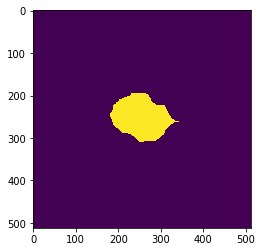

In [83]:
binary = binary_closing(binary,mask)
plt.figure()
plt.imshow(binary)

In [15]:
import image_processing as ip

In [27]:
for movie_idx in range(len())
masks = np.zeros([img.shape[0],img.shape[2],img.shape[3]])

feature

for i in range(img.shape[0]):
    masks[i,:,:],rp = ip.get_cell_mask(img[i,1,:,:],None)
    
    rp
    
print(masks.shape)

fluo = np.mean(np.mean(masks * img[:,0,:,:],axis=2),axis=1)




(124, 512, 512)
(124,)


(124,)


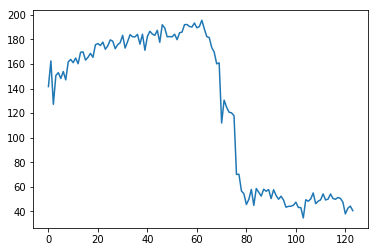

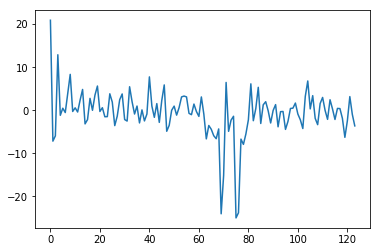

In [51]:
plt.plot(fluo)
co1 = np.convolve(fluo,[1,0,-1],mode='full')[0:-2]
co2 = np.convolve(fluo,[2,1,0,-1,-2],mode='full')[0:-4]
co3 = np.gradient(fluo,1)
print(co2.shape)
plt.figure()
#plt.plot(co1)
#plt.plot(co2)
plt.plot(co3)

In [84]:
class RunningStat:
    def __init__(self):
        self.length = 0
        
    def clear(self):
        self.length = 0
        
    def push(self,value):
        value = float(value)
        self.value = value
        self.length += 1
        if self.length == 1:
            self.old_m = self.new_m = value
            self.old_s = 0.0
        else:
            self.new_m = self.old_m + (value - self.old_m)/self.length
            self.new_s = self.old_s + (value - self.old_m)*(value - self.new_m)
            
            # set up for next iteration
            self.old_m = self.new_m
            self.old_s = self.new_m
    def get_length(self):
        return self.length
    def get_mean(self):
        return self.new_m
    def get_var(self):
        if self.length > 1:
            return self.new_s/(self.length - 1)
        else:
            return 0.0
    def get_std(self):
        return np.sqrt(self.get_var())
    def get_z(self):
        if self.get_std() > 0:
            return (self.value - self.new_m)/self.get_std()
        else:
            return 0.0
    mean = property(get_mean)
    var = property(get_var)
    std = property(get_std)
    z_score = property(get_z)

In [100]:
def gradient_zscore(input_series):
    gradients = np.gradient(input_series)
    gradients[0] = 0.
    rs = RunningStat()
    z_scores = []
    means = []
    stds = []
    for i in range(len(gradients)):
        rs.push(gradients[i])
        z_scores.append(rs.z_score)
        means.append(rs.mean)
        stds.append(rs.std)
    return gradients,means,stds,z_scores

In [126]:
from scipy.stats import zscore
import numpy as np

def gradient_trigger(input_series,threshold=-2.5):
    
    # function takes a 1D input series and outputs the gradients, z scores of the gradients
    # and the frame when the z score threshold is first crossed
    
    gradients = np.gradient(input_series)
    # set gradient of first data point to zero
    gradients[0] = 0.
    
    # set first 2 z_scores to 0
    z_scores = [0.,0.]
    for i in range(2,len(gradients)):
        z_scores.append(zscore(gradients[:i])[-1])
    
    z_scores = np.array(z_scores)
    if threshold >= 0:
        trigger_index = np.where(z_scores >= threshold)[0][0]
    else:
        trigger_index = np.where(z_scores <= threshold)[0][0]
        
    return gradients,z_scores,trigger_index



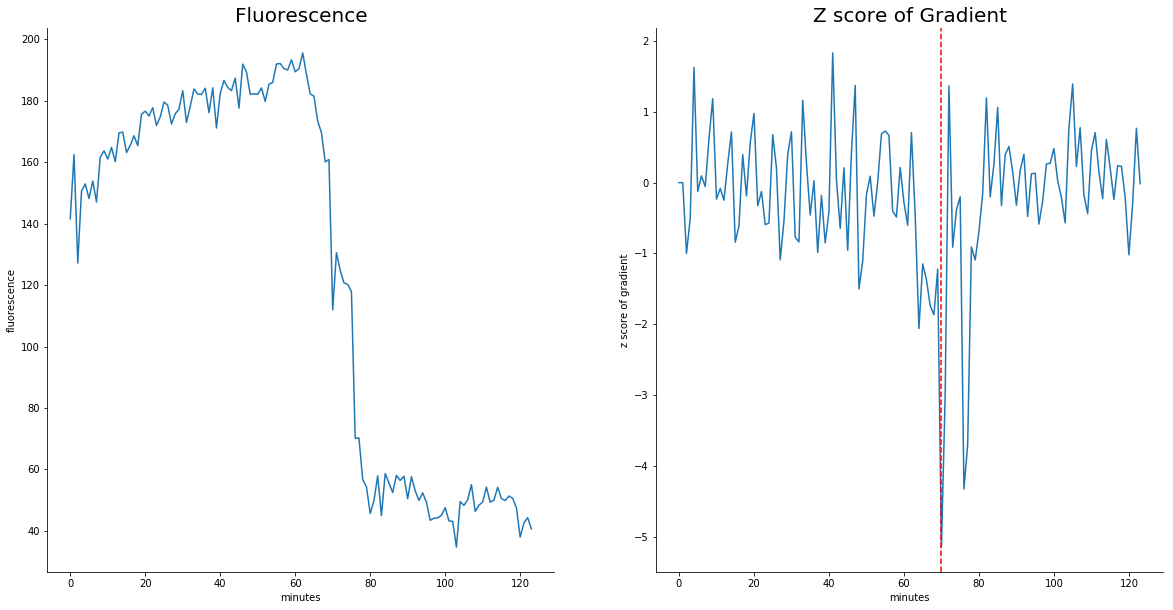

In [156]:
import seaborn.apionly as sns

gradients,z_scores,trigger_index = gradient_trigger(fluo)
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
ax1 = plt.gca()
ax1.set_ylabel('fluorescence')
ax1.set_xlabel('minutes')
plt.plot(fluo)
plt.title('Fluorescence',fontsize=20)
sns.despine()
plt.subplot(1,2,2)
ax2 = plt.gca()
ax2.set_ylabel('z score of gradient')
ax2.set_xlabel('minutes')
plt.plot(z_scores)
plt.title('Z score of Gradient',fontsize=20)
sns.despine()
plt.axvline(x=trigger_index,c='red',linestyle='--');
plt.savefig('trigger.png')

In [139]:
def get_cell_mask(frame,centroid,ptile=75,blur_sigma=15):
    props=[]

    #first get the mask from gray image
    img=frame[0,:,:]
    M=np.abs(img-np.percentile(img.flatten(),ptile))
    M=ndimage.gaussian_filter(M,blur_sigma)
    thr = filters.threshold_otsu(M)
    M=M>thr
    L=measure.label(M)
    RP=measure.regionprops(L,intensity_image=img)
    d2=[]
    for obj in RP:
        d2.append((obj.centroid[0]-centroid[0])**2+(obj.centroid[1]-centroid[1])**2)

    keep=np.argmin(d2)
    M[L!=keep+1]=0
    props.append(RP[keep])
    
    #now get the region properties using the fluoresence channels
    L=measure.label(M)
    RP=measure.regionprops(L,intensity_image=frame[1,:,:])
    props.append(RP[0])
    RP=measure.regionprops(L,intensity_image=frame[2,:,:])
    props.append(RP[0])

    return props, M

In [150]:
import skimage.io
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import filters
from skimage import measure

import image_data
import image_processing as ip

features = []
moviegen=image_data.all_movies()
for em,movie in enumerate(moviegen):

    start=max(image_data.images[em]['rounded']-30,0)
    stop=image_data.images[em]['egress']
    framegen=image_data.some_frames(movie,start,stop)
    x=image_data.synced_times(em)
    x=x[start:stop]
    
    movie_features=[]
    for ef,frame in enumerate(framegen):
        centroid,lab,nlab=ip.find_food_vacuole_centroid(frame[0,:,:])
        
        props , M=get_cell_mask(frame,centroid,ptile=75,blur_sigma=15)
        circ=4*np.pi*props[0].area/(props[0].perimeter**2)
        intens=props[1].mean_intensity
        entrop=measure.shannon_entropy(props[1].intensity_image)
        
        polar,(r,a) = ip.topolar(props[1].intensity_image)
        radscore=np.var(polar.sum(axis=0))
        # radscore=ip.feature_radial_std(frame,centroid,radius=50)

        movie_features.append(radscore)

    movie_features = np.array(features)
    maxfeat = movie_features.max(axis=0)
    minfeat = movie_features.min(axis=0)
    movie_features = (movie_features.astype(np.float)-minfeat) / (maxfeat-minfeat)

    plt.plot(x,movie_features)
    plt.draw()
    plt.pause(0.01)
    features.append(movie_features)

Loading movie recording1.czi - recording1.czi #03.tif


ValueError: zero-size array to reduction operation maximum which has no identity

In [149]:
print(features)

[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan]


In [89]:
rs.mean

1.5

In [90]:
rs.push(100)
rs.mean

34.333333333333336

In [ ]:
rs.